In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load dataset
usa = pd.read_csv('enigma_Aug_8_2020.csv')
usa.head()

,state_fips,state_name,lat,long,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,36,New York,42.913397,-75.596272,7/1/2020,398770,31791,394079.0,3577569.0,NaN,3971648.0,226.0,879.0,139.0,70590.0
1,36,New York,42.913397,-75.596272,7/2/2020,399642,31814,394954.0,3646639.0,NaN,4041593.0,209.0,878.0,129.0,70698.0
2,36,New York,42.913397,-75.596272,7/3/2020,400561,31836,395872.0,3712113.0,NaN,4107985.0,188.0,857.0,125.0,70794.0
3,36,New York,42.913397,-75.596272,7/4/2020,401286,31860,396598.0,3773790.0,NaN,4170388.0,190.0,844.0,119.0,70877.0
4,36,New York,42.913397,-75.596272,7/5/2020,401822,31895,397131.0,3836672.0,NaN,4233803.0,178.0,832.0,116.0,70968.0


In [3]:
# Remove not needed columns
usa = usa.drop(columns = ['state_fips', 'lat', 'long'])
usa.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,New York,7/1/2020,398770,31791,394079.0,3577569.0,NaN,3971648.0,226.0,879.0,139.0,70590.0
1,New York,7/2/2020,399642,31814,394954.0,3646639.0,NaN,4041593.0,209.0,878.0,129.0,70698.0
2,New York,7/3/2020,400561,31836,395872.0,3712113.0,NaN,4107985.0,188.0,857.0,125.0,70794.0
3,New York,7/4/2020,401286,31860,396598.0,3773790.0,NaN,4170388.0,190.0,844.0,119.0,70877.0
4,New York,7/5/2020,401822,31895,397131.0,3836672.0,NaN,4233803.0,178.0,832.0,116.0,70968.0


In [4]:
# Convert dates to datetime
usa['datetime'] = pd.to_datetime(usa['date'])
usa.tail()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
8149,New York,6/26/2020,395972,31075,391220.0,3290097.0,NaN,3681317.0,244.0,951.0,167.0,70010.0,2020-06-26
8150,New York,6/27/2020,396669,31105,391923.0,3362656.0,NaN,3754579.0,230.0,908.0,167.0,70010.0,2020-06-27
8151,New York,6/28/2020,397293,31137,392539.0,3423946.0,NaN,3816485.0,229.0,869.0,167.0,70010.0,2020-06-28
8152,New York,6/29/2020,397684,31143,392930.0,3469983.0,NaN,3862913.0,216.0,853.0,136.0,70435.0,2020-06-29
8153,New York,6/30/2020,398142,31776,393454.0,3521484.0,NaN,3914938.0,217.0,891.0,137.0,70487.0,2020-06-30


###  West North Central Divsion 4 (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)

In [5]:
# Creat DF for just West North Central
west_northern_central =  usa[(usa['state_name']=='Iowa') | (usa['state_name'] == 'Kansas') |
                      (usa['state_name'] == 'Minnesota') | (usa['state_name'] == 'Missouri') | 
                     (usa['state_name']=='North Dakota') | (usa['state_name']=='South Dakota')] 

west_northern_central.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
176,North Dakota,3/11/2020,1,0,0.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,2020-03-11
177,North Dakota,3/12/2020,1,0,1.0,12.0,14.0,13.0,NaN,NaN,NaN,NaN,2020-03-12
178,North Dakota,3/13/2020,1,0,1.0,39.0,12.0,40.0,NaN,NaN,NaN,NaN,2020-03-13
179,North Dakota,3/14/2020,1,0,1.0,54.0,14.0,55.0,NaN,NaN,NaN,NaN,2020-03-14
180,North Dakota,3/15/2020,1,0,1.0,95.0,4.0,96.0,NaN,NaN,NaN,NaN,2020-03-15


In [6]:
# Summing case count for Western Northern Central
# Groupby to consolidate cases by entire region

wnc_group = west_northern_central.groupby(["datetime"]).sum()
wnc_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0
2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0
2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0
2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0
2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0


In [7]:
# Sort by datetime and reset index
wnc_group.sort_values(by = 'datetime')
wnc_group = wnc_group.reset_index()
wnc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
140,2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0
141,2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0
142,2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0
143,2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0
144,2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0


In [8]:
# Finish datetime conversion
wnc_group['datetime'] = pd.to_datetime(wnc_group['datetime'])
wnc_group['day'] = wnc_group['datetime'].map(lambda x: x.day)
wnc_group['month'] = wnc_group['datetime'].map(lambda x: x.month)
wnc_group['year'] = wnc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
wnc_group['growth_rate'] = wnc_group['cases'].pct_change()
wnc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
140,2020-07-24,171407,4208,169034.0,2332495.0,0.0,2501529.0,278.0,1647.0,210.0,84981.0,24,7,2020,0.022483
141,2020-07-25,174036,4219,171821.0,2362999.0,0.0,2534820.0,285.0,1964.0,211.0,86157.0,25,7,2020,0.015338
142,2020-07-26,176951,4235,174660.0,2391636.0,0.0,2566296.0,290.0,1961.0,212.0,87249.0,26,7,2020,0.016749
143,2020-07-27,180225,4261,178009.0,2423595.0,0.0,2601604.0,262.0,1857.0,215.0,88412.0,27,7,2020,0.018502
144,2020-07-28,182605,4293,177964.0,2448856.0,0.0,2626820.0,271.0,1640.0,167.0,90149.0,28,7,2020,0.013206


In [9]:
# Look at the stats
wnc_group['growth_rate'].describe()

count    144.000000
mean       0.102193
std        0.227918
min        0.007319
25%        0.015921
50%        0.027547
75%        0.075900
max        2.000000
Name: growth_rate, dtype: float64

### Visualize Growth Rate and Cases

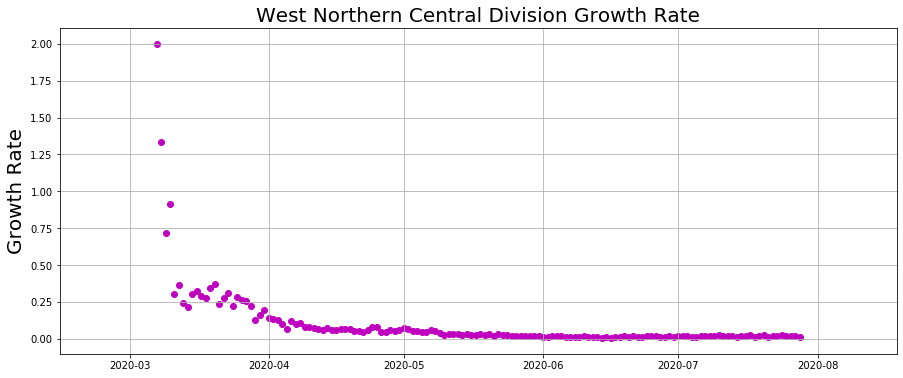

In [55]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(wnc_group['datetime'],wnc_group['growth_rate'],c='m',)
plt.grid(True)
plt.title("West Northern Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

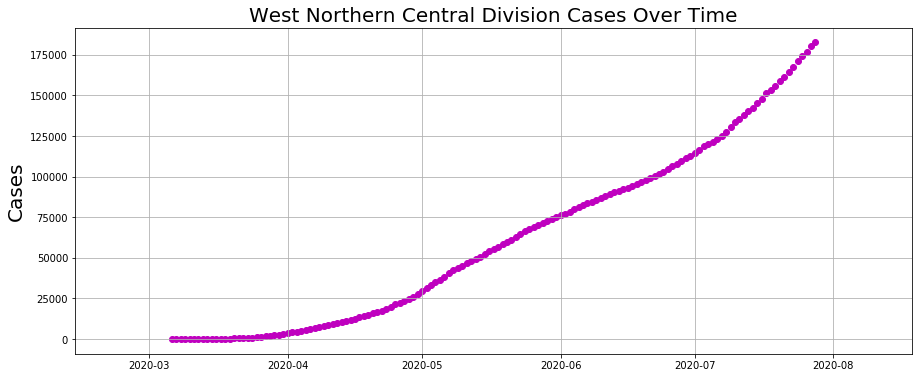

In [12]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(wnc_group['datetime'],wnc_group['cases'],c='m',)
plt.grid(True)
plt.title('West Northern Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### South Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)

In [13]:
# Make Df for just South Atlantic divsion.

south_atlantic = usa[(usa['state_name']=='Delaware') | (usa['state_name'] == 'Flordia') |
                      (usa['state_name'] == 'Georgia') | (usa['state_name'] == 'Maryland') | 
                     (usa['state_name']=='North Carolina') | (usa['state_name']=='South Carolina') |
                     (usa['state_name']=='Virginia') | (usa['state_name']== 'District of Columbia') |
                    (usa['state_name'] == 'West Virginia')]
south_atlantic.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
28,North Carolina,3/3/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03
29,North Carolina,3/4/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-04
30,North Carolina,3/5/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-05
31,North Carolina,3/6/2020,2,0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2020-03-06
32,North Carolina,3/7/2020,2,0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2020-03-07


In [14]:
# Summing case count for South Atlantic
# Groupby to consolidate cases by entire region

sa_group = south_atlantic.groupby(["datetime"]).sum()
sa_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,531870,13273,544679.0,5394842.0,451.0,5939521.0,847.0,7996.0,429.0,145626.0
2020-07-25,541575,13458,554664.0,5499322.0,416.0,6053986.0,859.0,7908.0,421.0,145998.0
2020-07-26,548459,13503,562210.0,5598062.0,393.0,6160272.0,837.0,7855.0,426.0,146172.0
2020-07-27,556839,13552,570864.0,5684445.0,379.0,6255309.0,832.0,8004.0,421.0,160060.0
2020-07-28,566202,13727,580360.0,5790991.0,436.0,6371351.0,1247.0,8076.0,433.0,164524.0


In [15]:
# Sort by datetime and reset index
sa_group.sort_values(by = 'datetime')
sa_group = sa_group.reset_index()
sa_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
144,2020-07-24,531870,13273,544679.0,5394842.0,451.0,5939521.0,847.0,7996.0,429.0,145626.0
145,2020-07-25,541575,13458,554664.0,5499322.0,416.0,6053986.0,859.0,7908.0,421.0,145998.0
146,2020-07-26,548459,13503,562210.0,5598062.0,393.0,6160272.0,837.0,7855.0,426.0,146172.0
147,2020-07-27,556839,13552,570864.0,5684445.0,379.0,6255309.0,832.0,8004.0,421.0,160060.0
148,2020-07-28,566202,13727,580360.0,5790991.0,436.0,6371351.0,1247.0,8076.0,433.0,164524.0


In [16]:
# Finish datetime conversion
sa_group['datetime'] = pd.to_datetime(sa_group['datetime'])
sa_group['day'] = sa_group['datetime'].map(lambda x: x.day)
sa_group['month'] = sa_group['datetime'].map(lambda x: x.month)
sa_group['year'] = sa_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
sa_group['growth_rate'] = sa_group['cases'].pct_change()
sa_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
144,2020-07-24,531870,13273,544679.0,5394842.0,451.0,5939521.0,847.0,7996.0,429.0,145626.0,24,7,2020,0.020313
145,2020-07-25,541575,13458,554664.0,5499322.0,416.0,6053986.0,859.0,7908.0,421.0,145998.0,25,7,2020,0.018247
146,2020-07-26,548459,13503,562210.0,5598062.0,393.0,6160272.0,837.0,7855.0,426.0,146172.0,26,7,2020,0.012711
147,2020-07-27,556839,13552,570864.0,5684445.0,379.0,6255309.0,832.0,8004.0,421.0,160060.0,27,7,2020,0.015279
148,2020-07-28,566202,13727,580360.0,5790991.0,436.0,6371351.0,1247.0,8076.0,433.0,164524.0,28,7,2020,0.016815


In [17]:
# Look at the stats
sa_group['growth_rate'].describe()

count    148.000000
mean       0.097981
std        0.161335
min        0.000000
25%        0.018657
50%        0.025359
75%        0.086179
max        1.000000
Name: growth_rate, dtype: float64

### Visualize Growth Rate and Cases

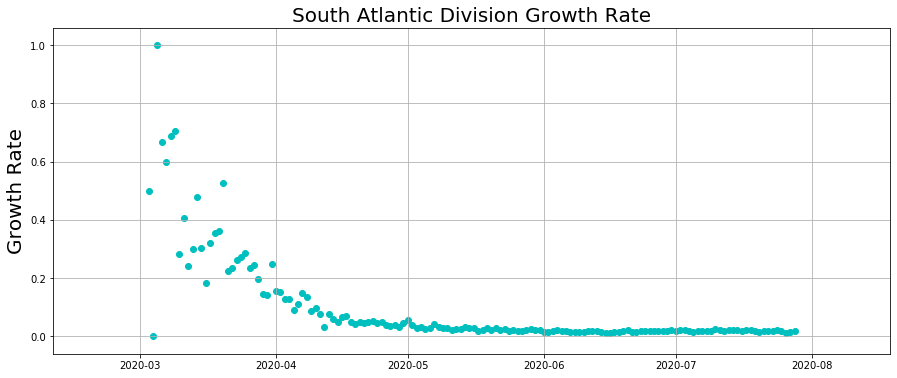

In [18]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(sa_group['datetime'],sa_group['growth_rate'],c='c',)
plt.grid(True)
plt.title("South Atlantic Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

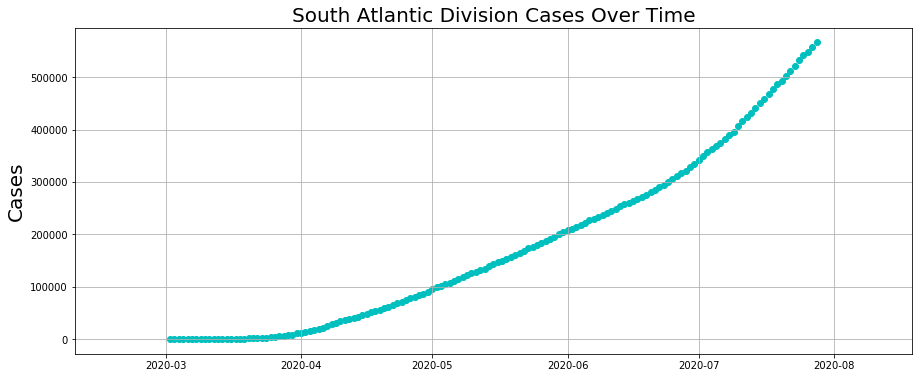

In [19]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(sa_group['datetime'],sa_group['cases'],c='c',)
plt.grid(True)
plt.title('South Atlantic Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### South Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)

In [20]:
# Create DF for just East South Central Divsion
east_south_central =  usa[(usa['state_name']=='Alabama') | (usa['state_name'] == 'Kentucky') |
                      (usa['state_name'] == 'Mississippi') | (usa['state_name'] == 'Tennessee')] 

east_south_central.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
1336,Tennessee,3/5/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-05
1337,Tennessee,3/6/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-06
1338,Tennessee,3/7/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-07
1339,Tennessee,3/8/2020,3,0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2020-03-08
1340,Tennessee,3/9/2020,4,0,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2020-03-09


In [21]:
# Summing case count for East South Central
# Groupby to consolidate cases by entire region

esc_group = east_south_central.groupby(["datetime"]).sum()
esc_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,238963,4542,240677.0,2655876.0,0.0,2896553.0,409.0,4864.0,163.0,123204.0
2020-07-25,245081,4606,246787.0,2690667.0,0.0,2937454.0,427.0,4606.0,159.0,124054.0
2020-07-26,250610,4641,252613.0,2744916.0,0.0,2997529.0,427.0,4585.0,159.0,124976.0
2020-07-27,256191,4683,258162.0,2786296.0,0.0,3044458.0,435.0,4715.0,166.0,132286.0
2020-07-28,261859,4757,261280.0,2806417.0,0.0,3067697.0,403.0,4786.0,169.0,132290.0


In [22]:
# Sort by datetime and reset index
esc_group.sort_values(by = 'datetime')
esc_group = esc_group.reset_index()
esc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
141,2020-07-24,238963,4542,240677.0,2655876.0,0.0,2896553.0,409.0,4864.0,163.0,123204.0
142,2020-07-25,245081,4606,246787.0,2690667.0,0.0,2937454.0,427.0,4606.0,159.0,124054.0
143,2020-07-26,250610,4641,252613.0,2744916.0,0.0,2997529.0,427.0,4585.0,159.0,124976.0
144,2020-07-27,256191,4683,258162.0,2786296.0,0.0,3044458.0,435.0,4715.0,166.0,132286.0
145,2020-07-28,261859,4757,261280.0,2806417.0,0.0,3067697.0,403.0,4786.0,169.0,132290.0


In [23]:
# Finish datetime conversion
esc_group['datetime'] = pd.to_datetime(esc_group['datetime'])
esc_group['day'] = esc_group['datetime'].map(lambda x: x.day)
esc_group['month'] = esc_group['datetime'].map(lambda x: x.month)
esc_group['year'] = esc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
esc_group['growth_rate'] = esc_group['cases'].pct_change()
esc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
141,2020-07-24,238963,4542,240677.0,2655876.0,0.0,2896553.0,409.0,4864.0,163.0,123204.0,24,7,2020,0.026716
142,2020-07-25,245081,4606,246787.0,2690667.0,0.0,2937454.0,427.0,4606.0,159.0,124054.0,25,7,2020,0.025602
143,2020-07-26,250610,4641,252613.0,2744916.0,0.0,2997529.0,427.0,4585.0,159.0,124976.0,26,7,2020,0.022560
144,2020-07-27,256191,4683,258162.0,2786296.0,0.0,3044458.0,435.0,4715.0,166.0,132286.0,27,7,2020,0.022270
145,2020-07-28,261859,4757,261280.0,2806417.0,0.0,3067697.0,403.0,4786.0,169.0,132290.0,28,7,2020,0.022124


In [24]:
# Look at the stats
esc_group['growth_rate'].describe()

count    145.000000
mean       0.106159
std        0.252436
min        0.000000
25%        0.023114
50%        0.028871
75%        0.060640
max        2.500000
Name: growth_rate, dtype: float64

### Visualize Growth Rate and Cases

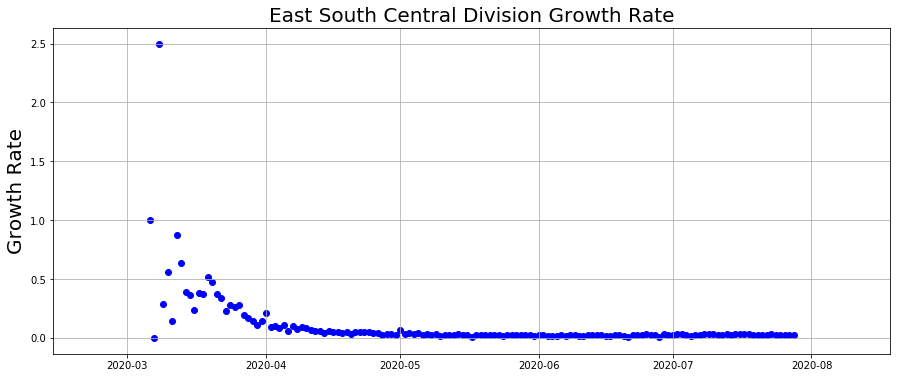

In [34]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(esc_group['datetime'],esc_group['growth_rate'],c='b',)
plt.grid(True)
plt.title("East South Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

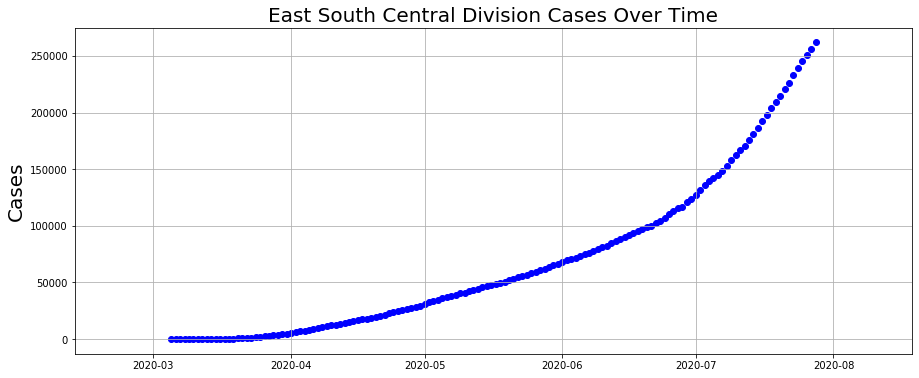

In [35]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(esc_group['datetime'],esc_group['cases'],c='b')
plt.grid(True)
plt.title('East South Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### South Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

In [36]:
west_south_central =  usa[(usa['state_name']=='Arkansas') | (usa['state_name'] == 'Louisiana') |
                      (usa['state_name'] == 'Oklahoma') | (usa['state_name'] == 'Texas') ] 

west_south_central.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
458,Oklahoma,3/6/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06
459,Oklahoma,3/7/2020,1,0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,2020-03-07
460,Oklahoma,3/8/2020,1,0,1.0,8.0,2.0,9.0,NaN,NaN,NaN,NaN,2020-03-08
461,Oklahoma,3/9/2020,1,0,1.0,8.0,10.0,9.0,NaN,NaN,NaN,NaN,2020-03-09
462,Oklahoma,3/10/2020,2,0,2.0,15.0,11.0,17.0,NaN,NaN,NaN,NaN,2020-03-10


In [37]:
# Summing case count for West South Central
# Groupby to consolidate cases by entire region

wsc_group = west_south_central.groupby(["datetime"]).sum()
wsc_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,553873,9469,539925.0,4876238.0,0.0,5416163.0,3541.0,13618.0,306.0,326776.0
2020-07-25,563517,9612,546910.0,4986031.0,0.0,5532941.0,3506.0,13615.0,306.0,336846.0
2020-07-26,573332,9750,559138.0,5088281.0,0.0,5647419.0,3506.0,13554.0,289.0,346883.0
2020-07-27,584300,10981,567973.0,5174136.0,0.0,5742109.0,3506.0,13607.0,318.0,348180.0
2020-07-28,597832,11264,579259.0,5253003.0,0.0,5832262.0,3343.0,12273.0,324.0,365456.0


In [38]:
# Sort by datetime and reset index
wsc_group.sort_values(by = 'datetime')
wsc_group = wsc_group.reset_index()
wsc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
163,2020-07-24,553873,9469,539925.0,4876238.0,0.0,5416163.0,3541.0,13618.0,306.0,326776.0
164,2020-07-25,563517,9612,546910.0,4986031.0,0.0,5532941.0,3506.0,13615.0,306.0,336846.0
165,2020-07-26,573332,9750,559138.0,5088281.0,0.0,5647419.0,3506.0,13554.0,289.0,346883.0
166,2020-07-27,584300,10981,567973.0,5174136.0,0.0,5742109.0,3506.0,13607.0,318.0,348180.0
167,2020-07-28,597832,11264,579259.0,5253003.0,0.0,5832262.0,3343.0,12273.0,324.0,365456.0


In [39]:
# Finish datetime conversion
wsc_group['datetime'] = pd.to_datetime(wsc_group['datetime'])
wsc_group['day'] = wsc_group['datetime'].map(lambda x: x.day)
wsc_group['month'] = wsc_group['datetime'].map(lambda x: x.month)
wsc_group['year'] = wsc_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
wsc_group['growth_rate'] = wsc_group['cases'].pct_change()
wsc_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
163,2020-07-24,553873,9469,539925.0,4876238.0,0.0,5416163.0,3541.0,13618.0,306.0,326776.0,24,7,2020,0.021729
164,2020-07-25,563517,9612,546910.0,4986031.0,0.0,5532941.0,3506.0,13615.0,306.0,336846.0,25,7,2020,0.017412
165,2020-07-26,573332,9750,559138.0,5088281.0,0.0,5647419.0,3506.0,13554.0,289.0,346883.0,26,7,2020,0.017417
166,2020-07-27,584300,10981,567973.0,5174136.0,0.0,5742109.0,3506.0,13607.0,318.0,348180.0,27,7,2020,0.019130
167,2020-07-28,597832,11264,579259.0,5253003.0,0.0,5832262.0,3343.0,12273.0,324.0,365456.0,28,7,2020,0.023159


In [41]:
# Look at the stats
wsc_group['growth_rate'].describe()

count    167.000000
mean       0.094517
std        0.189533
min        0.000000
25%        0.019541
50%        0.028188
75%        0.048438
max        1.500000
Name: growth_rate, dtype: float64

### Visualize Growth Rate and Cases

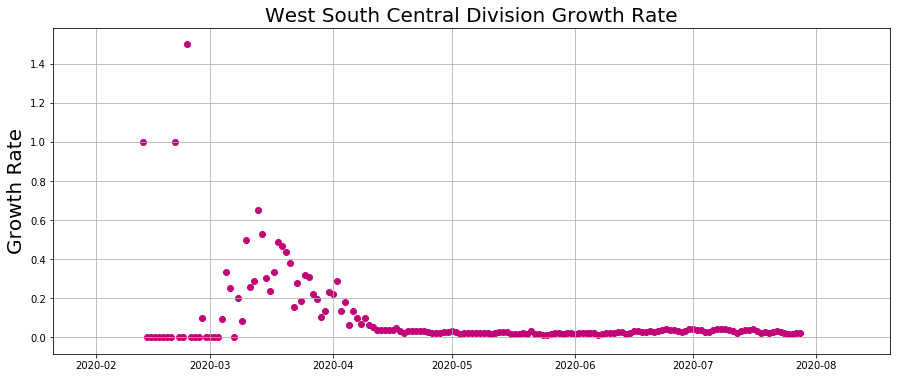

In [53]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(wsc_group['datetime'],wsc_group['growth_rate'],c='xkcd:magenta',)
plt.grid(True)
plt.title("West South Central Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

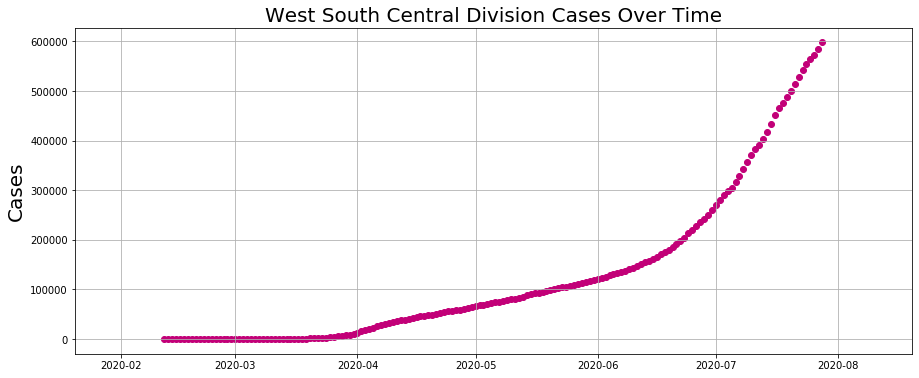

In [52]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(wsc_group['datetime'],wsc_group['cases'],c='xkcd:magenta')
plt.grid(True)
plt.title('West South Central Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### West Mountain Divsion 8 (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)

In [54]:
# Create a DF for just Mountain divsion
mountain =  usa[(usa['state_name']=='Arizona') | (usa['state_name'] == 'Colorado') |
                      (usa['state_name'] == 'Idaho') | (usa['state_name'] == 'Montana') | 
                     (usa['state_name']=='Nevada') | (usa['state_name']=='New Mexico') |
                     (usa['state_name']=='Utah') | (usa['state_name']== 'Wyoming') ]

mountain.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
1650,Utah,2/25/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25
1651,Utah,2/26/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26
1652,Utah,2/27/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27
1653,Utah,2/28/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28
1654,Utah,2/29/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29


In [56]:
# Summing case count for Mountain Division
# Groupby to consolidate cases by entire region

md_group = mountain.groupby(["datetime"]).sum()
md_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,318970,6766,316805.0,2761437.0,0.0,3078242.0,1295.0,5051.0,740.0,65738.0
2020-07-25,325932,6922,323905.0,2812009.0,0.0,3135914.0,1280.0,4932.0,774.0,67333.0
2020-07-26,330429,6955,329051.0,2851992.0,0.0,3181043.0,1279.0,4814.0,761.0,68641.0
2020-07-27,335224,6994,333523.0,2892845.0,0.0,3226368.0,1258.0,4754.0,751.0,69928.0
2020-07-28,340471,7155,338550.0,2930001.0,0.0,3268551.0,1263.0,4748.0,765.0,71294.0


In [57]:
# Sort by datetime and reset index
md_group.sort_values(by = 'datetime')
md_group = md_group.reset_index()
md_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
180,2020-07-24,318970,6766,316805.0,2761437.0,0.0,3078242.0,1295.0,5051.0,740.0,65738.0
181,2020-07-25,325932,6922,323905.0,2812009.0,0.0,3135914.0,1280.0,4932.0,774.0,67333.0
182,2020-07-26,330429,6955,329051.0,2851992.0,0.0,3181043.0,1279.0,4814.0,761.0,68641.0
183,2020-07-27,335224,6994,333523.0,2892845.0,0.0,3226368.0,1258.0,4754.0,751.0,69928.0
184,2020-07-28,340471,7155,338550.0,2930001.0,0.0,3268551.0,1263.0,4748.0,765.0,71294.0


In [58]:
# Finish datetime conversion
md_group['datetime'] = pd.to_datetime(md_group['datetime'])
md_group['day'] = md_group['datetime'].map(lambda x: x.day)
md_group['month'] = md_group['datetime'].map(lambda x: x.month)
md_group['year'] = md_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
md_group['growth_rate'] = md_group['cases'].pct_change()
md_group.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
180,2020-07-24,318970,6766,316805.0,2761437.0,0.0,3078242.0,1295.0,5051.0,740.0,65738.0,24,7,2020,0.022340
181,2020-07-25,325932,6922,323905.0,2812009.0,0.0,3135914.0,1280.0,4932.0,774.0,67333.0,25,7,2020,0.021827
182,2020-07-26,330429,6955,329051.0,2851992.0,0.0,3181043.0,1279.0,4814.0,761.0,68641.0,26,7,2020,0.013797
183,2020-07-27,335224,6994,333523.0,2892845.0,0.0,3226368.0,1258.0,4754.0,751.0,69928.0,27,7,2020,0.014511
184,2020-07-28,340471,7155,338550.0,2930001.0,0.0,3268551.0,1263.0,4748.0,765.0,71294.0,28,7,2020,0.015652


In [59]:
# Look at the stats
md_group['growth_rate'].describe()

count    184.000000
mean       0.082708
std        0.186395
min        0.000000
25%        0.015870
50%        0.026336
75%        0.042499
max        1.333333
Name: growth_rate, dtype: float64

### Visualize Growth Rate and Cases

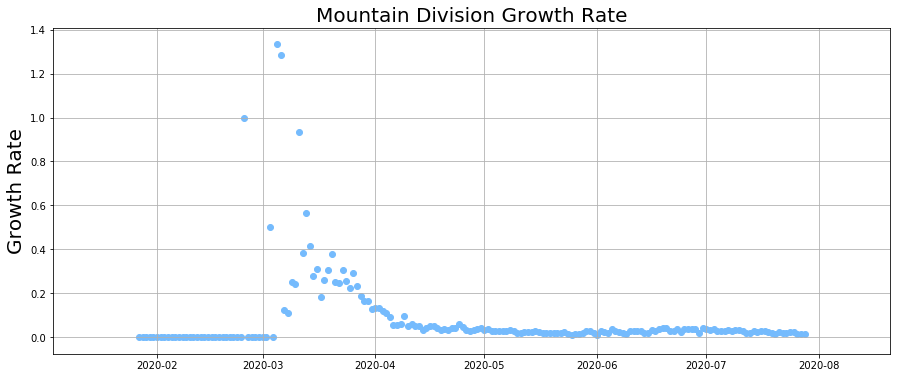

In [60]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(md_group['datetime'],md_group['growth_rate'],c='xkcd:sky blue',)
plt.grid(True)
plt.title("Mountain Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

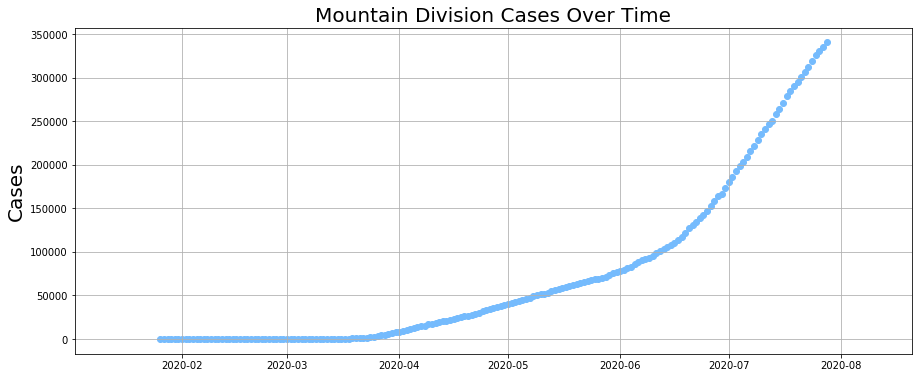

In [62]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(md_group['datetime'],md_group['cases'],c='xkcd:sky blue')
plt.grid(True)
plt.title('Mountain Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()

### West Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [64]:
# Make DF for just Pacific Divsion
pacific =  usa[(usa['state_name']=='California') | (usa['state_name'] == 'Hawaii') |
                      (usa['state_name'] == 'Oregon') | (usa['state_name'] == 'Washington') |
                      (usa['state_name']=='Alaska')]

pacific.head()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
603,Oregon,2/28/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28
604,Oregon,2/29/2020,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29
605,Oregon,3/1/2020,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01
606,Oregon,3/2/2020,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02
607,Oregon,3/3/2020,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03


In [65]:
# Summing case count for Pacific Division
# Groupby to consolidate cases by entire region

p_group = pacific.groupby(["datetime"]).sum()
p_group.tail()

,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
datetime,,,,,,,,,,
2020-07-24,516819,10243,505685.0,7959384.0,0.0,8465069.0,2342.0,9515.0,78.0,5466.0
2020-07-25,528166,10349,517133.0,8106070.0,0.0,8623203.0,2342.0,9527.0,84.0,5504.0
2020-07-26,535284,10381,526988.0,8244616.0,0.0,8771604.0,2342.0,9532.0,85.0,5525.0
2020-07-27,544665,10488,535162.0,8384812.0,0.0,8919974.0,2342.0,9517.0,72.0,5680.0
2020-07-28,554028,10699,542348.0,8524496.0,0.0,9066844.0,2256.0,9016.0,84.0,5763.0


In [66]:
# Sort by datetime and reset index
p_group.sort_values(by = 'datetime')
p_group = md_group.reset_index()
p_group.tail()

,index,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
180,180,2020-07-24,318970,6766,316805.0,2761437.0,0.0,3078242.0,1295.0,5051.0,740.0,65738.0,24,7,2020,0.022340
181,181,2020-07-25,325932,6922,323905.0,2812009.0,0.0,3135914.0,1280.0,4932.0,774.0,67333.0,25,7,2020,0.021827
182,182,2020-07-26,330429,6955,329051.0,2851992.0,0.0,3181043.0,1279.0,4814.0,761.0,68641.0,26,7,2020,0.013797
183,183,2020-07-27,335224,6994,333523.0,2892845.0,0.0,3226368.0,1258.0,4754.0,751.0,69928.0,27,7,2020,0.014511
184,184,2020-07-28,340471,7155,338550.0,2930001.0,0.0,3268551.0,1263.0,4748.0,765.0,71294.0,28,7,2020,0.015652


In [67]:
# Finish datetime conversion
p_group['datetime'] = pd.to_datetime(p_group['datetime'])
p_group['day'] = p_group['datetime'].map(lambda x: x.day)
p_group['month'] = p_group['datetime'].map(lambda x: x.month)
p_group['year'] = p_group['datetime'].map(lambda x: x.year)

# Now create new column for growth rate
p_group['growth_rate'] = p_group['cases'].pct_change()
p_group.tail()

,index,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
180,180,2020-07-24,318970,6766,316805.0,2761437.0,0.0,3078242.0,1295.0,5051.0,740.0,65738.0,24,7,2020,0.022340
181,181,2020-07-25,325932,6922,323905.0,2812009.0,0.0,3135914.0,1280.0,4932.0,774.0,67333.0,25,7,2020,0.021827
182,182,2020-07-26,330429,6955,329051.0,2851992.0,0.0,3181043.0,1279.0,4814.0,761.0,68641.0,26,7,2020,0.013797
183,183,2020-07-27,335224,6994,333523.0,2892845.0,0.0,3226368.0,1258.0,4754.0,751.0,69928.0,27,7,2020,0.014511
184,184,2020-07-28,340471,7155,338550.0,2930001.0,0.0,3268551.0,1263.0,4748.0,765.0,71294.0,28,7,2020,0.015652


In [68]:
# Look at the stats
p_group['growth_rate'].describe()

count    184.000000
mean       0.082708
std        0.186395
min        0.000000
25%        0.015870
50%        0.026336
75%        0.042499
max        1.333333
Name: growth_rate, dtype: float64

### Visualize Growth Rate and Cases

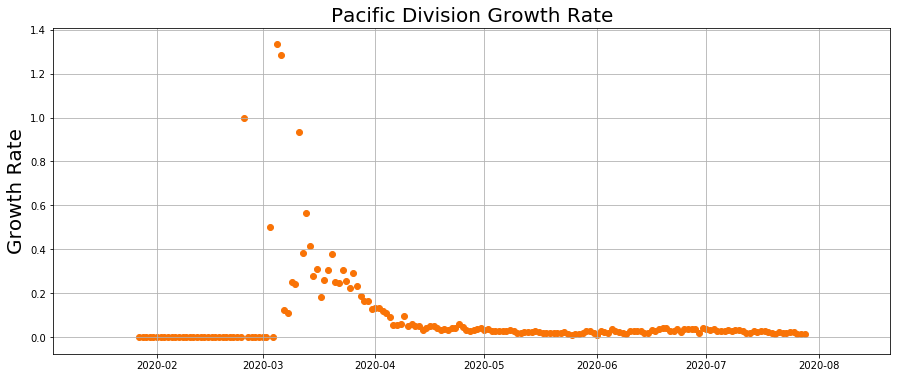

In [69]:
# Scatter plot for growth rate

plt.figure(figsize = (15, 6))
plt.scatter(p_group['datetime'],p_group['growth_rate'],c='xkcd:orange',)
plt.grid(True)
plt.title("Pacific Division Growth Rate", fontsize = 20)
plt.ylabel('Growth Rate', fontsize = 20)
plt.show()

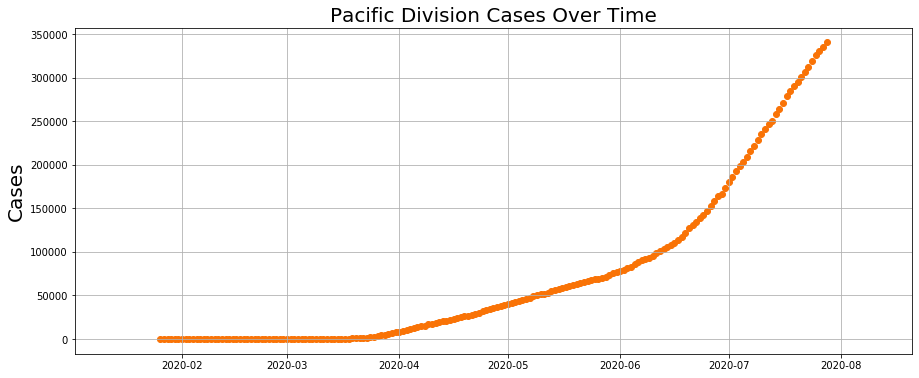

In [70]:
# Scatter plot for cases

plt.figure(figsize = (15, 6))
plt.scatter(p_group['datetime'],p_group['cases'],c='xkcd:orange')
plt.grid(True)
plt.title('Pacific Division Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()